In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
import sncosmo
import astropy.units as u
import glob
import numpy as np

teste = sncosmo.SALT2Source(modeldir=None, m0file='newM0.dat', m1file='salt2_template_1.dat', clfile='salt2_color_correction.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*.txt")

#print(names)
for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j])
    data['zp'] = 14.328
    for i in range(0, len(data['flux'])):
        data['fluxerr'][i] = np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i] #flux error conversion
        data['flux'][i] = 10**((data['zp'][i] - data['flux'][i])/2.5) #flux
        
    model = sncosmo.Model(source=teste)
    model.set(z=data['redshift'][1])  # set the model's redshift
    result, fitted_model = sncosmo.fit_lc(data, model,
                                      ['t0', 'x0', 'x1', 'c'])
    chi_quad_ndof.append(result.chisq/result.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()


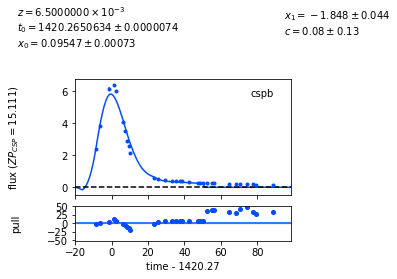

In [2]:
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors, zp=15.111, zpsys='csp')
plt.show()

In [3]:
np.mean(chi_quad_ndof)
len(chi_quad_ndof)

7

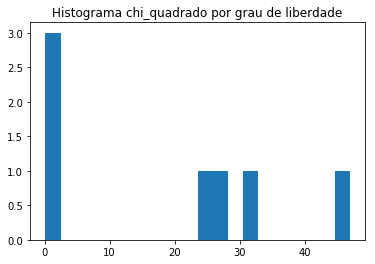

In [4]:
histograma = plt.hist(chi_quad_ndof, bins=20)
plt.title("Histograma chi_quadrado por grau de liberdade")
plt.show()

In [5]:
from __future__ import print_function
import matplotlib.pyplot as plt
import sncosmo
import astropy.units as u
import glob
import numpy as np

teste = sncosmo.SALT2Source(modeldir=None, m0file='newM0.dat', m1file='newM1.dat', clfile='salt2_color_correction.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*.txt")

#print(names)
for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j])
    data['zp'] = 14.328
    for i in range(0, len(data['flux'])):
        data['fluxerr'][i] = np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i] #flux error conversion
        data['flux'][i] = 10**((data['zp'][i] - data['flux'][i])/2.5) #flux
        
    model = sncosmo.Model(source=teste)
    model.set(z=data['redshift'][1])  # set the model's redshift
    result, fitted_model = sncosmo.fit_lc(data, model,
                                      ['t0', 'x0', 'x1', 'c'])
    chi_quad_ndof.append(result.chisq/result.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'newM1.dat'

In [ ]:
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors, zp=14.328, zpsys='csp')
plt.show()

In [ ]:
np.mean(chi_quad_ndof)
len(chi_quad_ndof)

In [ ]:
histograma = plt.hist(chi_quad_ndof, bins=20)
plt.title("Histograma chi_quadrado por grau de liberdade")
plt.show()